In [1]:
import os
import pandas as pd
import gower
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [3]:
cat = pd.read_csv("categorical_clean.csv",sep=";")
print(cat.shape)
cat.head(5)

(1887, 18)


,ΑΑ,latitude,longitude,ΑΡΙΘΜΟΣ,ΔΗΜΟΣ,ΔΙΑΜΕΤΡΟΣ,ΟΔΟΣ,ΟΝΟΜΑ,ΠΕΡΙΟΧΗ,ΤΚ,ΠΑΡΟΧΗ,ΚΑΛΛΙΚΡΑΤΙΚΟΣ,ΠΛΗΘΥΣΜΟΣ,ΤΟΜΕΑΣ,ΕΙΣΟΔΗΜΑ,name,ΑΡΙΘΜΟΣ_ΑΓΟΡΙΩΝ,ΑΡΙΘΜΟΣ_ΚΟΡΙΤΣΙΩΝ
0,1,35.126413,33.429859,87,ΝΙΚΑΙΑΣ,1.5,ΚΥΠΡΟΥ,2 ΔΗΜΟΤΙΚΟ ΝΙΚΑΙΑΣ,ΟΣΙΑ ΞΕΝΗ,18453,[582092],ΝΙΚΑΙΑΣ - ΑΓΙΟΥ ΙΩΑΝΝΗ ΡΕΝΤΗ,103355,Περιφερειακή Ενότητα Πειραιώς,"18125,24",ΝΙΚΑΙΑΣ 2 ΔΗΜΟΤΙΚΟ ΝΙΚΑΙΑΣ,72.0,75.0
1,2,37.958001,23.673601,30,ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ,5/8,ΜΑΝΔΗΛΑΡΑ ΝΙΚΗΦ.,5 ΔΗΜΟΤΙΚΟ ΡΕΝΤΗ,ΑΓ. Ι. ΡΕΝΤΗΣ,18233,[1705284],ΝΙΚΑΙΑΣ - ΑΓΙΟΥ ΙΩΑΝΝΗ ΡΕΝΤΗ,103355,Περιφερειακή Ενότητα Πειραιώς,"18159,49",ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ 5 ΔΗΜΟΤΙΚΟ ΡΕΝΤΗ,95.0,99.0
2,3,37.958726,23.669260,113,ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ,1,ΑΓ. ΙΩΑΝΝΟΥ ΡΕΝΤΗ,ΓΕΝΙΚΟ ΛΥΚΕΙΟ ΡΕΝΤΗ,ΑΠΟΛΛΩΝ,18233,[2062539],ΝΙΚΑΙΑΣ - ΑΓΙΟΥ ΙΩΑΝΝΗ ΡΕΝΤΗ,103355,Περιφερειακή Ενότητα Πειραιώς,"18159,49",ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ ΓΕΝΙΚΟ ΛΥΚΕΙΟ ΡΕΝΤΗ,13.0,25.0
3,4,37.958823,23.669353,10,ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ,1,ΜΕΓ. ΑΛΕΞΑΝΔΡΟΥ,4 ΔΗΜΟΤΙΚΟ-ΝΗΠΙΑΓΩΓΕΙΟ,ΑΓ. Ι. ΡΕΝΤΗΣ,18233,[1575755],ΝΙΚΑΙΑΣ - ΑΓΙΟΥ ΙΩΑΝΝΗ ΡΕΝΤΗ,103355,Περιφερειακή Ενότητα Πειραιώς,"18159,49",ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ 4 ΔΗΜΟΤΙΚΟ-ΝΗΠΙΑΓΩΓΕΙΟ,NaN,NaN
4,5,37.958855,23.671984,16,ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ,1,ΜΑΝΔΗΛΑΡΑ ΝΙΚΗΦ.,1ΟΝ ΓΥΜΝΑΣΙΟ ΡΕΝΤΗ,ΑΓ. Ι. ΡΕΝΤΗΣ,18233,[1255594],ΝΙΚΑΙΑΣ - ΑΓΙΟΥ ΙΩΑΝΝΗ ΡΕΝΤΗ,103355,Περιφερειακή Ενότητα Πειραιώς,"18159,49",ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ 1ΟΝ ΓΥΜΝΑΣΙΟ ΡΕΝΤΗ,98.0,106.0


In [4]:
cat["ΜΑΘΗΤΕΣ"]=cat["ΑΡΙΘΜΟΣ_ΑΓΟΡΙΩΝ"]+cat["ΑΡΙΘΜΟΣ_ΚΟΡΙΤΣΙΩΝ"]
print(cat.shape)
cat.head(5)

(1887, 19)


,ΑΑ,latitude,longitude,ΑΡΙΘΜΟΣ,ΔΗΜΟΣ,ΔΙΑΜΕΤΡΟΣ,ΟΔΟΣ,ΟΝΟΜΑ,ΠΕΡΙΟΧΗ,ΤΚ,ΠΑΡΟΧΗ,ΚΑΛΛΙΚΡΑΤΙΚΟΣ,ΠΛΗΘΥΣΜΟΣ,ΤΟΜΕΑΣ,ΕΙΣΟΔΗΜΑ,name,ΑΡΙΘΜΟΣ_ΑΓΟΡΙΩΝ,ΑΡΙΘΜΟΣ_ΚΟΡΙΤΣΙΩΝ,ΜΑΘΗΤΕΣ
0,1,35.126413,33.429859,87,ΝΙΚΑΙΑΣ,1.5,ΚΥΠΡΟΥ,2 ΔΗΜΟΤΙΚΟ ΝΙΚΑΙΑΣ,ΟΣΙΑ ΞΕΝΗ,18453,[582092],ΝΙΚΑΙΑΣ - ΑΓΙΟΥ ΙΩΑΝΝΗ ΡΕΝΤΗ,103355,Περιφερειακή Ενότητα Πειραιώς,"18125,24",ΝΙΚΑΙΑΣ 2 ΔΗΜΟΤΙΚΟ ΝΙΚΑΙΑΣ,72.0,75.0,147.0
1,2,37.958001,23.673601,30,ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ,5/8,ΜΑΝΔΗΛΑΡΑ ΝΙΚΗΦ.,5 ΔΗΜΟΤΙΚΟ ΡΕΝΤΗ,ΑΓ. Ι. ΡΕΝΤΗΣ,18233,[1705284],ΝΙΚΑΙΑΣ - ΑΓΙΟΥ ΙΩΑΝΝΗ ΡΕΝΤΗ,103355,Περιφερειακή Ενότητα Πειραιώς,"18159,49",ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ 5 ΔΗΜΟΤΙΚΟ ΡΕΝΤΗ,95.0,99.0,194.0
2,3,37.958726,23.669260,113,ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ,1,ΑΓ. ΙΩΑΝΝΟΥ ΡΕΝΤΗ,ΓΕΝΙΚΟ ΛΥΚΕΙΟ ΡΕΝΤΗ,ΑΠΟΛΛΩΝ,18233,[2062539],ΝΙΚΑΙΑΣ - ΑΓΙΟΥ ΙΩΑΝΝΗ ΡΕΝΤΗ,103355,Περιφερειακή Ενότητα Πειραιώς,"18159,49",ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ ΓΕΝΙΚΟ ΛΥΚΕΙΟ ΡΕΝΤΗ,13.0,25.0,38.0
3,4,37.958823,23.669353,10,ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ,1,ΜΕΓ. ΑΛΕΞΑΝΔΡΟΥ,4 ΔΗΜΟΤΙΚΟ-ΝΗΠΙΑΓΩΓΕΙΟ,ΑΓ. Ι. ΡΕΝΤΗΣ,18233,[1575755],ΝΙΚΑΙΑΣ - ΑΓΙΟΥ ΙΩΑΝΝΗ ΡΕΝΤΗ,103355,Περιφερειακή Ενότητα Πειραιώς,"18159,49",ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ 4 ΔΗΜΟΤΙΚΟ-ΝΗΠΙΑΓΩΓΕΙΟ,NaN,NaN,NaN
4,5,37.958855,23.671984,16,ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ,1,ΜΑΝΔΗΛΑΡΑ ΝΙΚΗΦ.,1ΟΝ ΓΥΜΝΑΣΙΟ ΡΕΝΤΗ,ΑΓ. Ι. ΡΕΝΤΗΣ,18233,[1255594],ΝΙΚΑΙΑΣ - ΑΓΙΟΥ ΙΩΑΝΝΗ ΡΕΝΤΗ,103355,Περιφερειακή Ενότητα Πειραιώς,"18159,49",ΑΓ. ΙΩΑΝΝΗ ΡΕΝΤΗ 1ΟΝ ΓΥΜΝΑΣΙΟ ΡΕΝΤΗ,98.0,106.0,204.0


In [5]:
cat =cat[["ΑΑ","ΔΙΑΜΕΤΡΟΣ","ΤΟΜΕΑΣ","ΜΑΘΗΤΕΣ"]]
print(cat.shape)
cat.head(5)

(1887, 4)


,ΑΑ,ΔΙΑΜΕΤΡΟΣ,ΤΟΜΕΑΣ,ΜΑΘΗΤΕΣ
0,1,1.5,Περιφερειακή Ενότητα Πειραιώς,147.0
1,2,5/8,Περιφερειακή Ενότητα Πειραιώς,194.0
2,3,1,Περιφερειακή Ενότητα Πειραιώς,38.0
3,4,1,Περιφερειακή Ενότητα Πειραιώς,NaN
4,5,1,Περιφερειακή Ενότητα Πειραιώς,204.0


In [6]:
cat.isna().sum()

ΑΑ             0
ΔΙΑΜΕΤΡΟΣ      0
ΤΟΜΕΑΣ         0
ΜΑΘΗΤΕΣ      377
dtype: int64

In [7]:
cat=cat.dropna() 
print(cat.shape)
cat.head(5)

(1510, 4)


,ΑΑ,ΔΙΑΜΕΤΡΟΣ,ΤΟΜΕΑΣ,ΜΑΘΗΤΕΣ
0,1,1.5,Περιφερειακή Ενότητα Πειραιώς,147.0
1,2,5/8,Περιφερειακή Ενότητα Πειραιώς,194.0
2,3,1,Περιφερειακή Ενότητα Πειραιώς,38.0
4,5,1,Περιφερειακή Ενότητα Πειραιώς,204.0
7,8,5/8,Περιφερειακή Ενότητα Πειραιώς,66.0


In [8]:
cat.isna().sum()

ΑΑ           0
ΔΙΑΜΕΤΡΟΣ    0
ΤΟΜΕΑΣ       0
ΜΑΘΗΤΕΣ      0
dtype: int64

In [15]:
kyv = pd.read_csv("monthly_consumptions.csv")
print(kyv.shape)
kyv.head(5)

(224728, 8)


,Unnamed: 0,ID,School,Month,Monthly Consumption,isCovid,isSummer,isHalfSummer
0,0,1,ΛΕΩΚΟΡΙΟΥ 35 Δήμος ΑΘΗΝΑΙΩΝ ΤΚ 10553,2015-07,9.377442,False,True,False
1,1,1,ΛΕΩΚΟΡΙΟΥ 35 Δήμος ΑΘΗΝΑΙΩΝ ΤΚ 10553,2015-08,6.898571,False,True,False
2,2,1,ΛΕΩΚΟΡΙΟΥ 35 Δήμος ΑΘΗΝΑΙΩΝ ΤΚ 10553,2015-09,6.898571,False,False,True
3,3,1,ΛΕΩΚΟΡΙΟΥ 35 Δήμος ΑΘΗΝΑΙΩΝ ΤΚ 10553,2015-10,25.001906,False,False,False
4,4,1,ΛΕΩΚΟΡΙΟΥ 35 Δήμος ΑΘΗΝΑΙΩΝ ΤΚ 10553,2015-11,42.404944,False,False,False


In [16]:
kyv = kyv.groupby('ID').mean()
print(kyv.shape)
kyv.head(5)

(1586, 5)


,Unnamed: 0,Monthly Consumption,isCovid,isSummer,isHalfSummer
ID,,,,,
1,43.5,27.513519,0.056818,0.181818,0.170455
2,160.0,21.613450,0.034483,0.165517,0.165517
3,303.5,98.351619,0.035211,0.161972,0.161972
4,447.0,56.626967,0.034483,0.165517,0.165517
5,592.0,11.460915,0.034483,0.165517,0.165517


In [17]:
kyv = kyv.reset_index()
print(kyv.shape)
kyv.head(5)

(1586, 6)


,ID,Unnamed: 0,Monthly Consumption,isCovid,isSummer,isHalfSummer
0,1,43.5,27.513519,0.056818,0.181818,0.170455
1,2,160.0,21.613450,0.034483,0.165517,0.165517
2,3,303.5,98.351619,0.035211,0.161972,0.161972
3,4,447.0,56.626967,0.034483,0.165517,0.165517
4,5,592.0,11.460915,0.034483,0.165517,0.165517


In [18]:
kyv = kyv[["ID","Monthly Consumption"]]
print(kyv.shape)
kyv.head(5)

(1586, 2)


,ID,Monthly Consumption
0,1,27.513519
1,2,21.613450
2,3,98.351619
3,4,56.626967
4,5,11.460915


In [19]:
kyv.isna().sum()

ID                     0
Monthly Consumption    0
dtype: int64

In [20]:
df=pd.merge(cat,
            kyv,
            left_on="ΑΑ",
            right_on="ID",
            how="inner")
print(df.shape)
df.head(5)

(1299, 6)


,ΑΑ,ΔΙΑΜΕΤΡΟΣ,ΤΟΜΕΑΣ,ΜΑΘΗΤΕΣ,ID,Monthly Consumption
0,1,1.5,Περιφερειακή Ενότητα Πειραιώς,147.0,1,27.513519
1,2,5/8,Περιφερειακή Ενότητα Πειραιώς,194.0,2,21.613450
2,3,1,Περιφερειακή Ενότητα Πειραιώς,38.0,3,98.351619
3,5,1,Περιφερειακή Ενότητα Πειραιώς,204.0,5,11.460915
4,8,5/8,Περιφερειακή Ενότητα Πειραιώς,66.0,8,9.233153


In [21]:
df=df.set_index("ΑΑ")
print(df.shape)
df.head(5)

(1299, 5)


,ΔΙΑΜΕΤΡΟΣ,ΤΟΜΕΑΣ,ΜΑΘΗΤΕΣ,ID,Monthly Consumption
ΑΑ,,,,,
1,1.5,Περιφερειακή Ενότητα Πειραιώς,147.0,1,27.513519
2,5/8,Περιφερειακή Ενότητα Πειραιώς,194.0,2,21.613450
3,1,Περιφερειακή Ενότητα Πειραιώς,38.0,3,98.351619
5,1,Περιφερειακή Ενότητα Πειραιώς,204.0,5,11.460915
8,5/8,Περιφερειακή Ενότητα Πειραιώς,66.0,8,9.233153


In [22]:
df=df.drop(["ID"], axis=1)
print(df.shape)
df.head(5)

(1299, 4)


,ΔΙΑΜΕΤΡΟΣ,ΤΟΜΕΑΣ,ΜΑΘΗΤΕΣ,Monthly Consumption
ΑΑ,,,,
1,1.5,Περιφερειακή Ενότητα Πειραιώς,147.0,27.513519
2,5/8,Περιφερειακή Ενότητα Πειραιώς,194.0,21.613450
3,1,Περιφερειακή Ενότητα Πειραιώς,38.0,98.351619
5,1,Περιφερειακή Ενότητα Πειραιώς,204.0,11.460915
8,5/8,Περιφερειακή Ενότητα Πειραιώς,66.0,9.233153


In [23]:
df.isna().sum()

ΔΙΑΜΕΤΡΟΣ              0
ΤΟΜΕΑΣ                 0
ΜΑΘΗΤΕΣ                0
Monthly Consumption    0
dtype: int64

In [24]:
df=df.drop_duplicates()
print(df.shape)
df.head(5)

(1299, 4)


,ΔΙΑΜΕΤΡΟΣ,ΤΟΜΕΑΣ,ΜΑΘΗΤΕΣ,Monthly Consumption
ΑΑ,,,,
1,1.5,Περιφερειακή Ενότητα Πειραιώς,147.0,27.513519
2,5/8,Περιφερειακή Ενότητα Πειραιώς,194.0,21.613450
3,1,Περιφερειακή Ενότητα Πειραιώς,38.0,98.351619
5,1,Περιφερειακή Ενότητα Πειραιώς,204.0,11.460915
8,5/8,Περιφερειακή Ενότητα Πειραιώς,66.0,9.233153


In [25]:
df.dtypes

ΔΙΑΜΕΤΡΟΣ               object
ΤΟΜΕΑΣ                  object
ΜΑΘΗΤΕΣ                float64
Monthly Consumption    float64
dtype: object

In [26]:
d1=gower.gower_matrix(df,weight=np.array([50/3,50/3,50/3,50]))
d1

array([[0.        , 0.17494647, 0.19568436, ..., 0.35364783, 0.35764098,
        0.19135545],
       [0.17494647, 0.        , 0.20396416, ..., 0.17870137, 0.18269451,
        0.35176882],
       [0.19568436, 0.20396416, 0.        , ..., 0.38266554, 0.38665867,
        0.379097  ],
       ...,
       [0.35364783, 0.17870137, 0.38266554, ..., 0.        , 0.00590172,
        0.17920242],
       [0.35764098, 0.18269451, 0.38665867, ..., 0.00590172, 0.        ,
        0.17422834],
       [0.19135545, 0.35176882, 0.379097  , ..., 0.17920242, 0.17422834,
        0.        ]], dtype=float32)

Finding an interesting number of clusters in a dendrogram is the same as finding the largest horizontal space that doesn't have any vertical lines (the space with the longest vertical lines). This means that there's more separation between the clusters.

We can draw a horizontal line that passes through that longest distance:

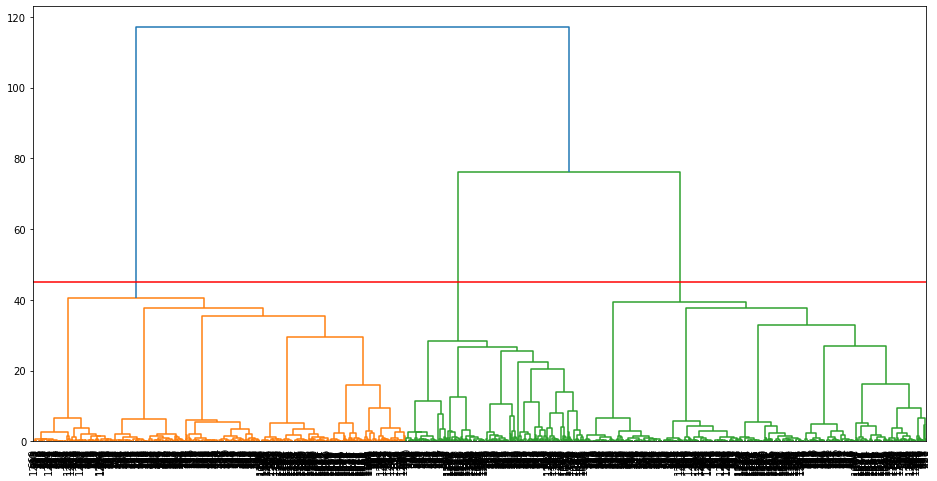

In [27]:
cl_mergings = linkage(d1, method="ward")
plt.figure(figsize=(16,8))
dendrogram(cl_mergings,orientation='top',leaf_font_size=10)
plt.axhline(y = 45, color = 'r', linestyle = '-')
plt.show()

In [28]:
hc_labels = fcluster(cl_mergings, 3, criterion='maxclust')
hc_labels

array([2, 1, 3, ..., 1, 1, 2], dtype=int32)

In [29]:
df["cl"]=hc_labels
df

,ΔΙΑΜΕΤΡΟΣ,ΤΟΜΕΑΣ,ΜΑΘΗΤΕΣ,Monthly Consumption,cl
ΑΑ,,,,,
1,1.5,Περιφερειακή Ενότητα Πειραιώς,147.0,27.513519,2
2,5/8,Περιφερειακή Ενότητα Πειραιώς,194.0,21.613450,1
3,1,Περιφερειακή Ενότητα Πειραιώς,38.0,98.351619,3
5,1,Περιφερειακή Ενότητα Πειραιώς,204.0,11.460915,3
8,5/8,Περιφερειακή Ενότητα Πειραιώς,66.0,9.233153,1
...,...,...,...,...,...
1581,5/8,Περιφερειακή Ενότητα Δυτικού Τομέα Αθηνών,75.0,0.594093,1
1582,1,Περιφερειακή Ενότητα Δυτικού Τομέα Αθηνών,252.0,5.879873,3
1583,5/8,Περιφερειακή Ενότητα Δυτικού Τομέα Αθηνών,252.0,3.751924,1


In [31]:
df["cl"].value_counts()

1    541
3    498
2    260
Name: cl, dtype: int64

In [32]:
df[["ΜΑΘΗΤΕΣ","Monthly Consumption","cl"]].groupby('cl').mean().round(2)

,ΜΑΘΗΤΕΣ,Monthly Consumption
cl,,
1,156.27,48.68
2,234.83,71.98
3,196.58,44.21


In [33]:
df[["ΔΙΑΜΕΤΡΟΣ","cl"]].pivot_table(index='cl', columns="ΔΙΑΜΕΤΡΟΣ", aggfunc='size').fillna(0)

ΔΙΑΜΕΤΡΟΣ,1,1.5,1/2,2,3,3/4,4,5/8,6
cl,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,541.0,0.0
2,0.0,172.0,10.0,66.0,3.0,1.0,1.0,3.0,4.0
3,498.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df[["ΤΟΜΕΑΣ","cl"]].pivot_table(index='cl', columns="ΤΟΜΕΑΣ", aggfunc='size').fillna(0)

ΤΟΜΕΑΣ,Περιφερειακή Ενότητα Ανατολικής Αττικής,Περιφερειακή Ενότητα Βορείου Τομέα Αθηνών,Περιφερειακή Ενότητα Δυτικής Αττικής,Περιφερειακή Ενότητα Δυτικού Τομέα Αθηνών,Περιφερειακή Ενότητα Κεντρικού Τομέα Αθηνών,Περιφερειακή Ενότητα Νήσων,Περιφερειακή Ενότητα Νοτίου Τομέα Αθηνών,Περιφερειακή Ενότητα Πειραιώς
cl,,,,,,,,
1,50.0,40.0,7.0,100.0,117.0,13.0,104.0,110.0
2,22.0,29.0,0.0,56.0,41.0,3.0,47.0,62.0
3,47.0,42.0,0.0,96.0,112.0,11.0,116.0,74.0


In [28]:
df.to_csv('C:\\Users\\tsekourash\\Desktop\\eydap\\clustered_df.csv')

In [35]:
df

,ΔΙΑΜΕΤΡΟΣ,ΤΟΜΕΑΣ,ΜΑΘΗΤΕΣ,Monthly Consumption,cl
ΑΑ,,,,,
1,1.5,Περιφερειακή Ενότητα Πειραιώς,147.0,27.513519,2
2,5/8,Περιφερειακή Ενότητα Πειραιώς,194.0,21.613450,1
3,1,Περιφερειακή Ενότητα Πειραιώς,38.0,98.351619,3
5,1,Περιφερειακή Ενότητα Πειραιώς,204.0,11.460915,3
8,5/8,Περιφερειακή Ενότητα Πειραιώς,66.0,9.233153,1
...,...,...,...,...,...
1581,5/8,Περιφερειακή Ενότητα Δυτικού Τομέα Αθηνών,75.0,0.594093,1
1582,1,Περιφερειακή Ενότητα Δυτικού Τομέα Αθηνών,252.0,5.879873,3
1583,5/8,Περιφερειακή Ενότητα Δυτικού Τομέα Αθηνών,252.0,3.751924,1
